In [1]:
from google.colab import files
uploaded = files.upload()

Saving carbonemission.csv to carbonemission.csv


In [3]:
import pandas as pd
import numpy as np


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM


In [6]:
import pandas as pd

# Replace with the path to your file
df = pd.read_csv("carbonemission.csv")

In [7]:
print("Shape:", df.shape)
print("Columns:", df.columns)
print("Missing values:\n", df.isnull().sum())

Shape: (13512, 28)
Columns: Index(['Country code', 'Country name', 'Series code', 'Series name', 'SCALE',
       'Decimals', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011'],
      dtype='object')
Missing values:
 Country code       0
Country name       0
Series code        0
Series name        0
SCALE              0
Decimals           0
1990            3495
1991            3495
1992            3495
1993            3495
1994            3495
1995            3495
1996            3495
1997            3495
1998            3495
1999            3495
2000            3495
2001            3495
2002            3495
2003            3495
2004            3495
2005            3495
2006            3495
2007            3495
2008            3495
2009            3495
2010            3495
2011            1130
dtype: int64


In [11]:
df_long = pd.melt(
    df,
    id_vars=['Country code', 'Country name', 'Series code', 'Series name', 'SCALE', 'Decimals'],
    var_name='year',
    value_name='value'

In [12]:
df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')

In [13]:
df_long = df_long.dropna(subset=['value'])

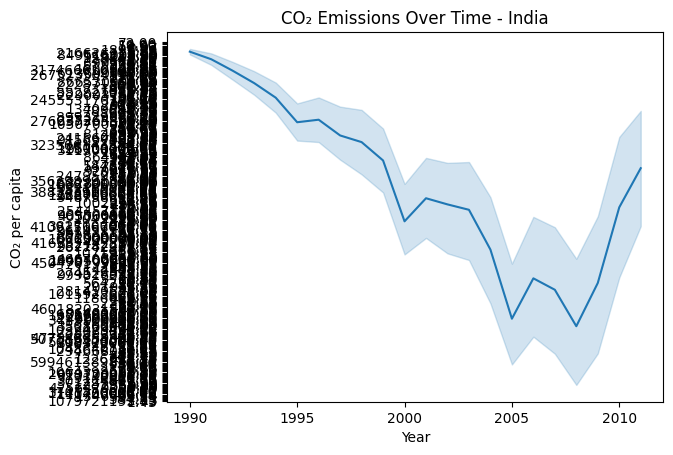

In [14]:
india_df = df_long[df_long['Country name'] == 'India'].sort_values('year')

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=india_df, x='year', y='value')
plt.title('CO₂ Emissions Over Time - India')
plt.xlabel("Year")
plt.ylabel("CO₂ per capita")
plt.show()


In [15]:
latest_year = df_long['year'].max()
latest_df = df_long[df_long['year'] == latest_year]

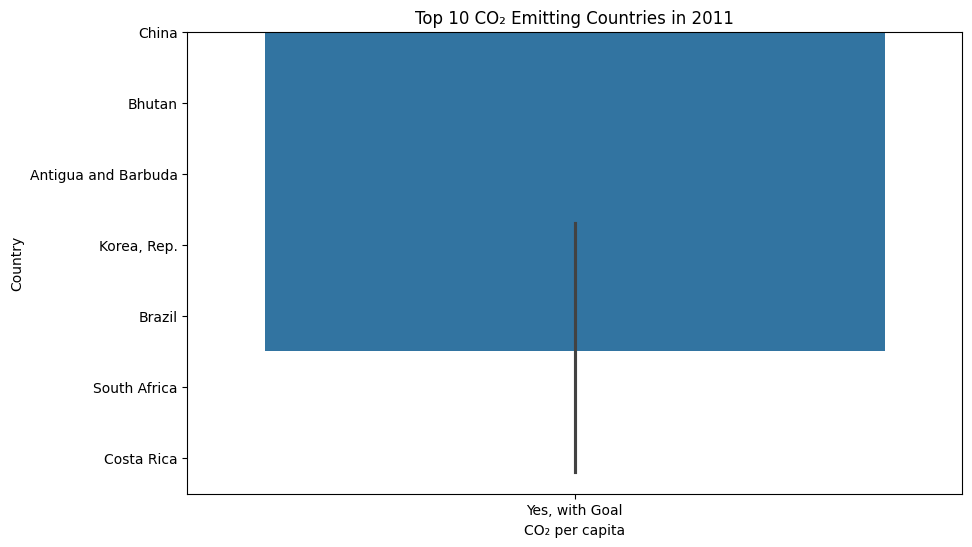

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
top_countries = latest_df.sort_values('value', ascending=False).head(10)
sns.barplot(data=top_countries, x='value', y='Country name')
plt.title(f'Top 10 CO₂ Emitting Countries in {latest_year}')
plt.xlabel('CO₂ per capita')
plt.ylabel('Country')
plt.show()

In [17]:
df_long = pd.melt(
    df,  # your original wide-format DataFrame
    id_vars=['Country code', 'Country name', 'Series code', 'Series name', 'SCALE', 'Decimals'],
    var_name='year',
    value_name='value'
)
df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
df_long = df_long.dropna(subset=['value'])  # optional

In [18]:
from sklearn.preprocessing import MinMaxScaler
country = 'India'
df_country = df_long[df_long['Country name'] == country].sort_values('year')
df_country = df_country[['year', 'value']].dropna()

# Convert 'value' to numeric (handles '..' or other strings)
df_country['value'] = pd.to_numeric(df_country['value'], errors='coerce')

# Drop rows that couldn't be converted
df_country = df_country.dropna(subset=['value'])

# Now normalize
scaler = MinMaxScaler()
df_country['value'] = scaler.fit_transform(df_country[['value']])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

model = Sequential([
    Input(shape=(window_size, 1)),
    LSTM(64),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=100, batch_size=4, verbose=1)


Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0072
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0090
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0041
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134
Epoch 11/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055
Epoch 12/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093
Epoch 13/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063
Epoch 14/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111
Epoch 15/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


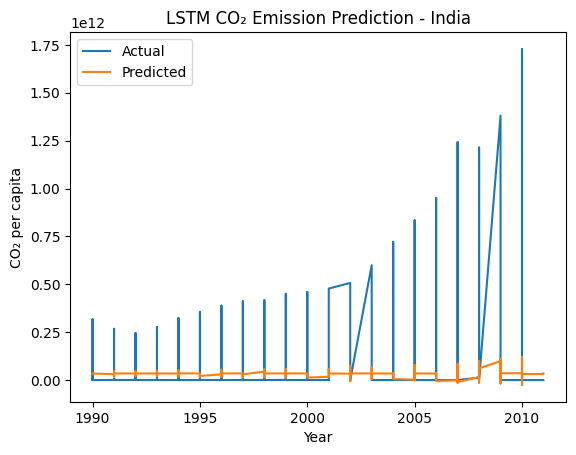

In [23]:
pred = model.predict(X)
pred = scaler.inverse_transform(pred)
actual = scaler.inverse_transform(y.reshape(-1, 1))

# Plot
plt.plot(df_country['year'][window_size:], actual, label='Actual')
plt.plot(df_country['year'][window_size:], pred, label='Predicted')
plt.title(f"LSTM CO₂ Emission Prediction - {country}")
plt.xlabel("Year")
plt.ylabel("CO₂ per capita")
plt.legend()
plt.show()

In [25]:
model.save('lstm_co2_model.h5')
df_country.to_csv('co2_india_lstm_data.csv', index=False)

In [26]:
# Prepare data for LSTM
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        v = X.iloc[i:(i + time_step)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_step])
    return np.array(Xs), np.array(ys)

window_size = 10  # Define window_size here
X, y = create_dataset(df_country['value'], df_country['value'], window_size)

In [27]:
X = X.reshape((X.shape[0], X.shape[1], 1))


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM

model = Sequential([
    Input(shape=(window_size, 1)),
    LSTM(64),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


In [29]:
model.fit(X, y, epochs=100, batch_size=4, verbose=1)


Epoch 1/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0100
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0159
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0038
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080
Epoch 11/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057
Epoch 12/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0053
Epoch 13/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0065
Epoch 14/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0104
Epoch 15/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 1

In [30]:
predictions = model.predict(X)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


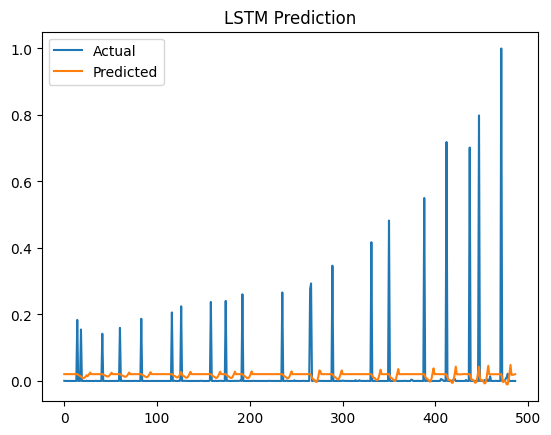

In [31]:
import matplotlib.pyplot as plt

plt.plot(y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('LSTM Prediction')
plt.show()
